# Source of Data used
The data used in this project was obtained from Nasa's data repository. The repository is a collection of datasets donated by agencies, companies and univeristies where the datasets can be used for prognostic through prognostic algorithms. The run to failure engine dataset was used to make the deep learning model.

The dataset used was obtained fom C-MAPSS(Commercial Modular Aero-Propulsion System Simulation), a system model that enables the user to input variations of parameters related to the health of the engine and gets the resultant sensor measurements as output.This C-MAPSS is used to track engine degradation by tracking the flow and efficiency of the engine. C-MAPSS is coded in MATLAB and Simulink and the user can input values of choice. Engine model simulated was 90,000lb thrust operating at altitude from sea level to 40,000ft, Mach numbers from 0 to 0.90, and temperatures of range -60 to 103 degree(F). A power management system, a fan speed controller and a set of limiters and regulators are also include.To come up with this data NASA studied the degradation of the CF6-50 engine.

The data set is a multivariate time series. Each entry (row) reflects an operational cycle of a specific engine identified by engine id and cycle time. There are multiple entries per engine to represent different reporting times. Other columns represents different features 3 operational settings and 21 sensors:

    1)      engine id
    2)      time, in cycles
    3)      operational setting 1
    4)      operational setting 2
    5)      operational setting 3
    6)      sensor measurement  1
    7)      sensor measurement  2
    ...
    26)     sensor measurement  21
    
   The engine id, time in cycles, operational settings and the sensors have been assigned their respective variables.The dataset used in this project was FD004.txt.

In [11]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [12]:
train_file = 'train_FD004.txt'
test_file = 'test_FDOO4.txt'
index_names= ['unit_nr', 'time-cycles']
setting_names= ['Altitude', 'Mach_No', 'TRA']
sensor_names=  ['T2','T24','T30','T50','P2','P15','P30','Nf', 'Nc','epr','Ps30','phi','NRf','NRc'
                ,'BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
col_names= index_names + setting_names + sensor_names
train =pd.read_csv(("train_FD004.txt"), sep= '\s+', header = None, names= col_names)
test= pd.read_csv(("test_FD004.txt"), sep= '\s+', header = None, names= col_names) 
y_test = pd.read_csv(("RUL_FD004.txt"), sep= '\s+', header = None, names= ['RemainingUsefulLife'])

print(train.shape)
train.head()

(61249, 26)


unit_nr  time-cycles  Altitude  Mach_No    TRA      T2     T24      T30  \
0        1            1   42.0049   0.8400  100.0  445.00  549.68  1343.43   
1        1            2   20.0020   0.7002  100.0  491.19  606.07  1477.61   
2        1            3   42.0038   0.8409  100.0  445.00  548.95  1343.12   
3        1            4   42.0000   0.8400  100.0  445.00  548.70  1341.24   
4        1            5   25.0063   0.6207   60.0  462.54  536.10  1255.23   

       T50    P2  ...     phi      NRf      NRc      BPR  farB  htBleed  \
0  1112.93  3.91  ...  129.78  2387.99  8074.83   9.3335  0.02      330   
1  1237.50  9.35  ...  312.59  2387.73  8046.13   9.1913  0.02      361   
2  1117.05  3.91  ...  129.62  2387.97  8066.62   9.4007  0.02      329   
3  1118.03  3.91  ...  129.80  2388.02  8076.05   9.3369  0.02      328   
4  1033.59  7.05  ...  164.11  2028.08  7865.80  10.8366  0.02      305   

   Nf_dmd  PCNfR_dmd    W31      W32  
0    2212     100.00  10.62   6.3670  
1    2324     100.00  24.37  14.6552  
2    2212     100.00  10.48   6.4213  
3    2212     100.00  10.54   6.4176  
4    1915      84.93  14.03   8.6754  

[5 rows x 26 columns]

In [13]:
train.tail()


unit_nr  time-cycles  Altitude  Mach_No    TRA      T2     T24  \
61244      249          251    9.9998   0.2500  100.0  489.05  605.33   
61245      249          252    0.0028   0.0015  100.0  518.67  643.42   
61246      249          253    0.0029   0.0000  100.0  518.67  643.68   
61247      249          254   35.0046   0.8400  100.0  449.44  555.77   
61248      249          255   42.0030   0.8400  100.0  445.00  549.85   

           T30      T50     P2  ...     phi      NRf      NRc     BPR  farB  \
61244  1516.36  1315.28  10.52  ...  380.16  2388.73  8185.69  8.4541  0.03   
61245  1598.92  1426.77  14.62  ...  535.02  2388.46  8185.47  8.2221  0.03   
61246  1607.72  1430.56  14.62  ...  535.41  2388.48  8193.94  8.2525  0.03   
61247  1381.29  1148.18   5.48  ...  187.92  2388.83  8125.64  9.0515  0.02   
61248  1369.75  1147.45   3.91  ...  134.32  2388.66  8144.33  9.1207  0.02   

       htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
61244      372    2319      100.0  29.11  17.5234  
61245      396    2388      100.0  39.38  23.7151  
61246      395    2388      100.0  39.78  23.8270  
61247      337    2223      100.0  15.26   9.0774  
61248      333    2212      100.0  10.66   6.4341  

[5 rows x 26 columns]

In [14]:
train[index_names].describe()


unit_nr   time-cycles
count  61249.000000  61249.000000
mean     124.325181    134.311417
std       71.995350     89.783389
min        1.000000      1.000000
25%       60.000000     62.000000
50%      126.000000    123.000000
75%      185.000000    191.000000
max      249.000000    543.000000

In [15]:
train[setting_names].describe()

Altitude       Mach_No           TRA
count  61249.000000  61249.000000  61249.000000
mean      23.999823      0.571347     94.031576
std       14.780722      0.310703     14.251954
min        0.000000      0.000000     60.000000
25%       10.004600      0.250700    100.000000
50%       25.001400      0.700000    100.000000
75%       41.998100      0.840000    100.000000
max       42.008000      0.842000    100.000000

In [16]:
train[sensor_names].describe()

T2           T24           T30           T50            P2  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.342647    106.167598    119.327591      3.622872   
min      445.000000    535.480000   1242.670000   1024.420000      3.910000   
25%      445.000000    549.330000   1350.550000   1119.490000      3.910000   
50%      462.540000    555.740000   1367.680000   1136.920000      7.050000   
75%      491.190000    607.070000   1497.420000   1302.620000     10.520000   
max      518.670000    644.420000   1613.000000   1440.770000     14.620000   

                P15           P30            Nf            Nc           epr  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean      11.589457    283.328633   2228.686034   8524.673301      1.096445   
std        5.444017    146.880210    145.348243    336.927547      0.127681   
min        5.670000    136.170000   1914.720000   7984.510000      0.930000   
25%        5.720000    142.920000   2211.950000   8320.590000      1.020000   
50%        9.030000    194.960000   2223.070000   8362.760000      1.030000   
75%       15.480000    394.280000   2323.930000   8777.250000      1.260000   
max       21.610000    570.810000   2388.640000   9196.810000      1.320000   

       ...           phi           NRf           NRc           BPR  \
count  ...  61249.000000  61249.000000  61249.000000  61249.000000   
mean   ...    266.735665   2334.427590   8067.811812      9.285604   
std    ...    138.479109    128.197859     85.670543      0.750374   
min    ...    128.310000   2027.570000   7845.780000      8.175700   
25%    ...    134.520000   2387.910000   8062.630000      8.648000   
50%    ...    183.450000   2388.060000   8083.810000      9.255600   
75%    ...    371.400000   2388.170000   8128.350000      9.365800   
max    ...    537.490000   2390.490000   8261.650000     11.066300   

               farB       htBleed        Nf_dmd     PCNfR_dmd           W31  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean       0.023252    347.760029   2228.613283     97.751396     20.864333   
std        0.004685     27.808283    145.472491      5.369424      9.936396   
min        0.020000    302.000000   1915.000000     84.930000     10.160000   
25%        0.020000    330.000000   2212.000000    100.000000     10.940000   
50%        0.020000    334.000000   2223.000000    100.000000     14.930000   
75%        0.030000    368.000000   2324.000000    100.000000     28.560000   
max        0.030000    399.000000   2388.000000    100.000000     39.890000   

                W32  
count  61249.000000  
mean      12.518995  
std        5.962697  
min        6.084300  
25%        6.566100  
50%        8.960100  
75%       17.135500  
max       23.885200  

[8 rows x 21 columns]

plotting the heatmap to show the correlation between the parameters

<AxesSubplot: >

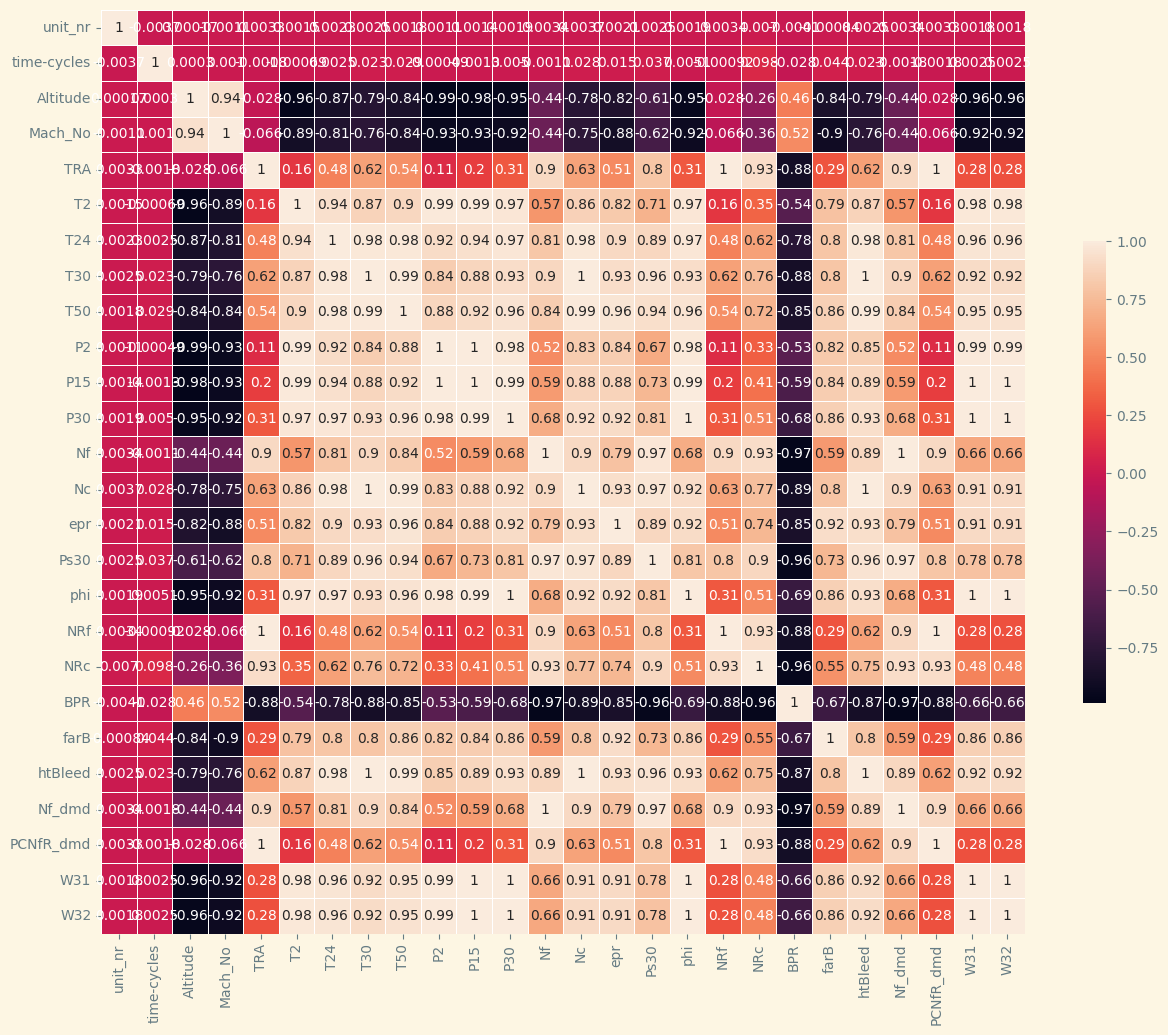

In [17]:
corr= train.corr()
fig, ax =plt.subplots()
fig.set_size_inches(15,12)
sns.heatmap(corr, annot= True, square= True,  linewidths=.5, cbar_kws={"shrink": .5})

Analysing the total number of cycles of various engines

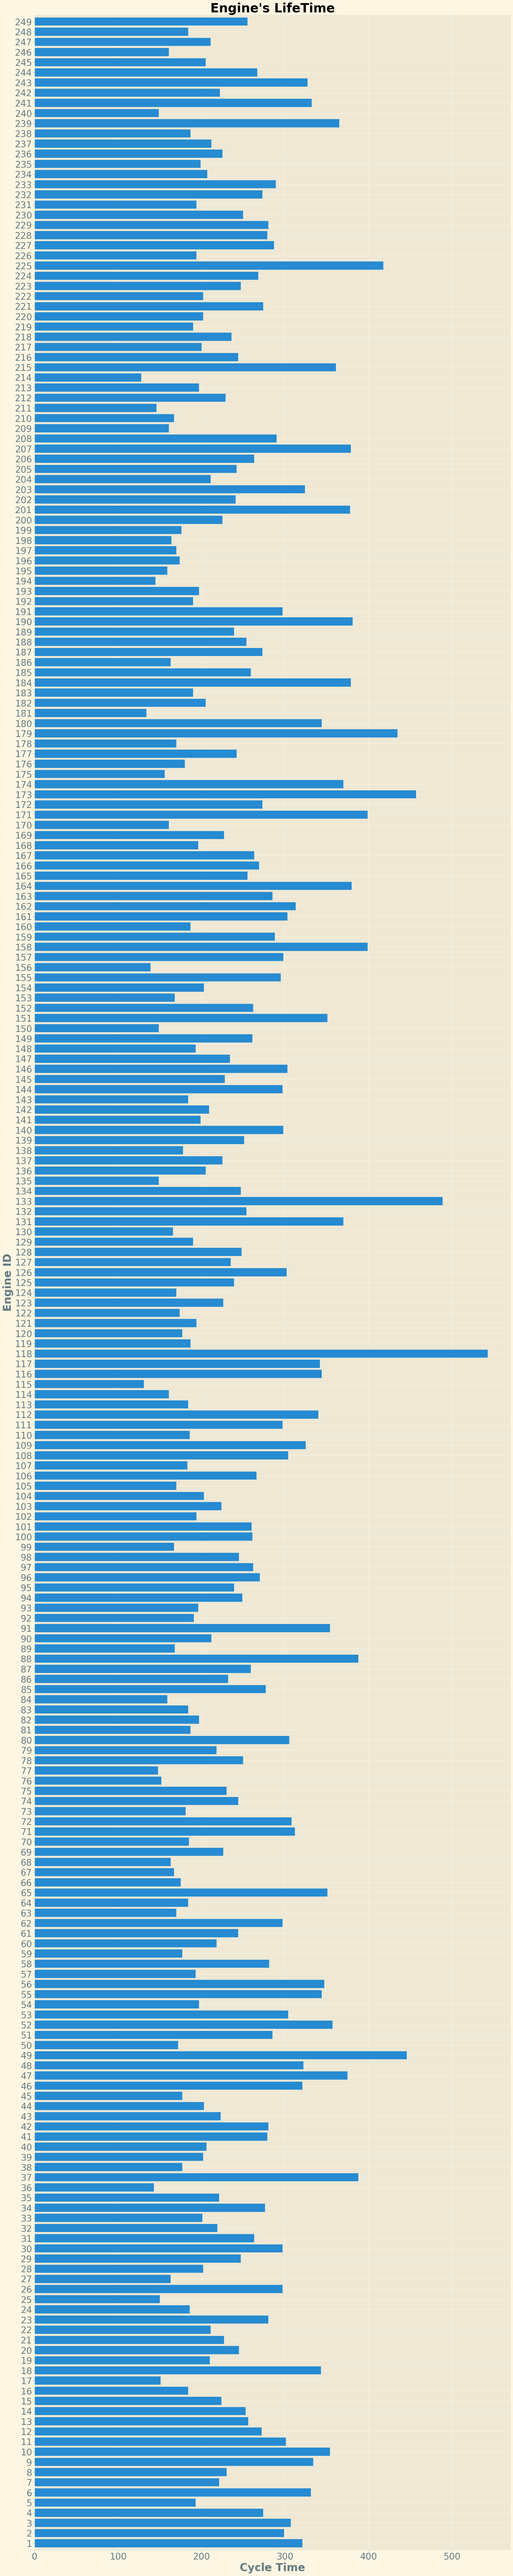

In [18]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,100))
ax= train.groupby('unit_nr')['time-cycles'].max().plot(kind= 'barh', width = 0.8, stacked= True, align= 'center', rot= 0)
plt.title("Engine's LifeTime", fontweight= 'bold', size =35)
plt.xlabel('Cycle Time', fontweight= 'bold', size =30)
plt.xticks(size =25)
plt.ylabel('Engine ID', fontweight= 'bold', size =30)
plt.yticks(size =25)
plt.grid(True)
plt.tight_layout()
plt.show()

Adding a column of RUL to the dataframe

In [19]:
def add_remaining_useful_life(df):
#     Get the total number of cycles for each unit 
    grouped_by_unit= df.groupby(by= 'unit_nr')
    max_cycles = grouped_by_unit['time-cycles'].max()
    
#     Merging the maximum cycles back into the original dataframe
    result_frame= df.merge(max_cycles.to_frame(name='max_cycle'), left_on ='unit_nr', right_index= True)
    
#     calculating remaining useful life after every cycle
    remaining_useful_life= result_frame["max_cycle"] - result_frame["time-cycles"]
    result_frame["RUL"]= remaining_useful_life
    
#     dropping the maximum cycles
    result_frame= result_frame.drop("max_cycle", axis= 1)
    return result_frame
train= add_remaining_useful_life(train)
train[index_names+['RUL']].head()

unit_nr  time-cycles  RUL
0        1            1  320
1        1            2  319
2        1            3  318
3        1            4  317
4        1            5  316

In [20]:
train.head()

unit_nr  time-cycles  Altitude  Mach_No    TRA      T2     T24      T30  \
0        1            1   42.0049   0.8400  100.0  445.00  549.68  1343.43   
1        1            2   20.0020   0.7002  100.0  491.19  606.07  1477.61   
2        1            3   42.0038   0.8409  100.0  445.00  548.95  1343.12   
3        1            4   42.0000   0.8400  100.0  445.00  548.70  1341.24   
4        1            5   25.0063   0.6207   60.0  462.54  536.10  1255.23   

       T50    P2  ...      NRf      NRc      BPR  farB  htBleed  Nf_dmd  \
0  1112.93  3.91  ...  2387.99  8074.83   9.3335  0.02      330    2212   
1  1237.50  9.35  ...  2387.73  8046.13   9.1913  0.02      361    2324   
2  1117.05  3.91  ...  2387.97  8066.62   9.4007  0.02      329    2212   
3  1118.03  3.91  ...  2388.02  8076.05   9.3369  0.02      328    2212   
4  1033.59  7.05  ...  2028.08  7865.80  10.8366  0.02      305    1915   

   PCNfR_dmd    W31      W32  RUL  
0     100.00  10.62   6.3670  320  
1     100.00  24.37  14.6552  319  
2     100.00  10.48   6.4213  318  
3     100.00  10.54   6.4176  317  
4      84.93  14.03   8.6754  316  

[5 rows x 27 columns]

Analysing the distribution of RUL for different engines using a Histogram

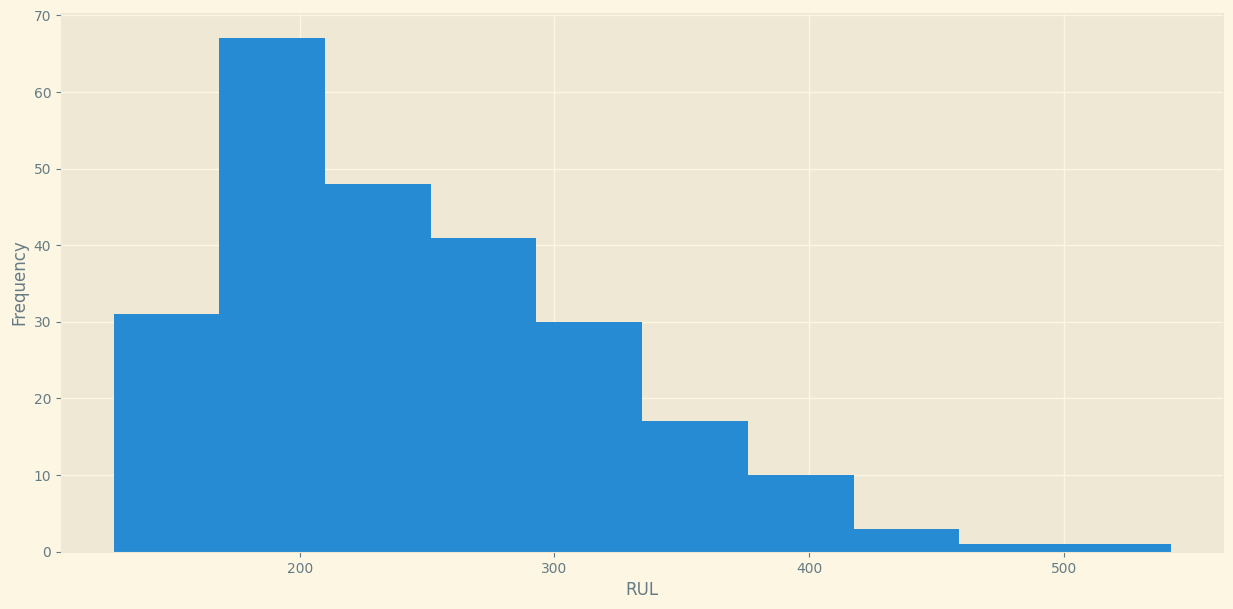

In [21]:
df_max_rul =train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=10,figsize= (15,7))
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

Using a standard scaler according to the different conditions the engine is operating

In [22]:
def add_operating_condition(df):
    df_op_cond=df.copy()
    df_op_cond['Altitude']= df_op_cond['Altitude'].round()
    df_op_cond['Mach_No'].round(2)
#     converting the condition setting to categorical variable
    df_op_cond['op_cond']= df_op_cond['Altitude'].astype(str)+ '_' + \
                            df_op_cond['Mach_No'].astype(str)+ '_'+ \
                            df_op_cond['TRA'].astype(str)
    return df_op_cond

In [23]:
def condition_scaler(df_train, df_test, sensor_names):
#     applying the operating condition specific standard scaling 
    scaler= StandardScaler()
    for condition in df_train['op_cond'].unique():
        scaler.fit(df_train.loc[df_train['op_cond']== condition, sensor_names])
    return df_train, df_test

X_train_condition= add_operating_condition(train)
X_test_condition= add_operating_condition(test)
X_train_condition_scaled, X_test_condition_scaled= condition_scaler(X_train_condition, X_test_condition, sensor_names)

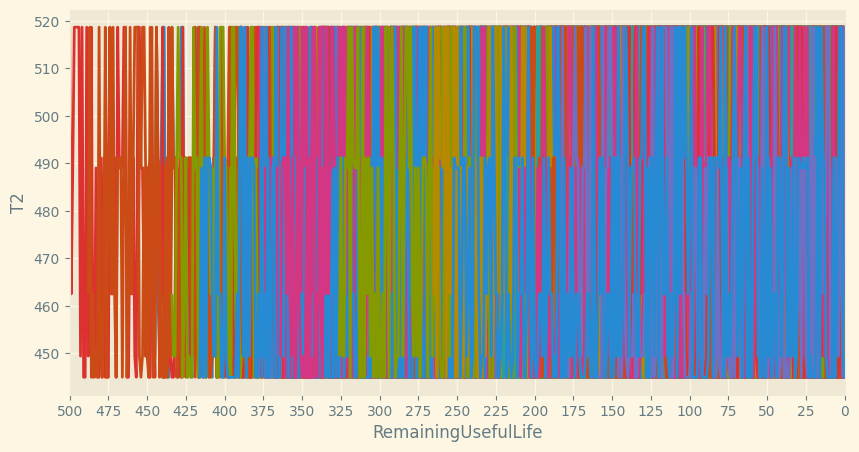

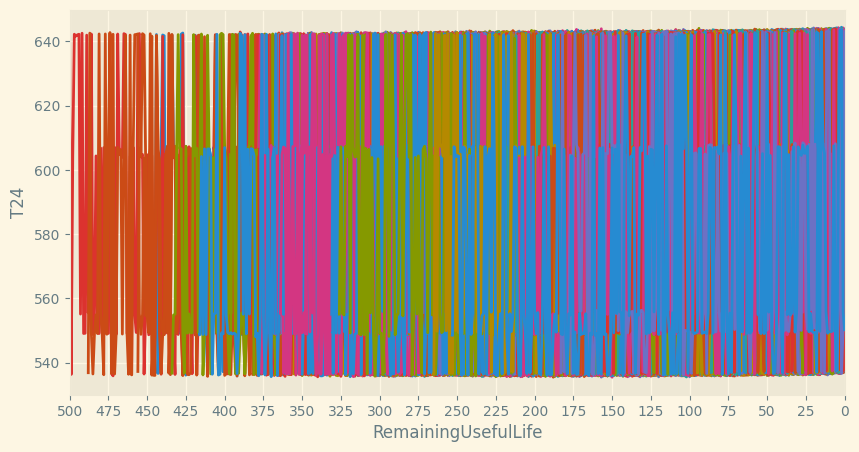

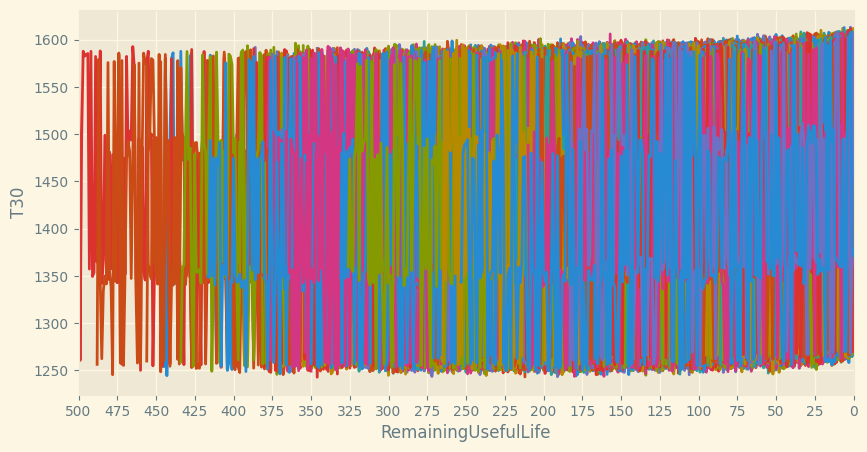

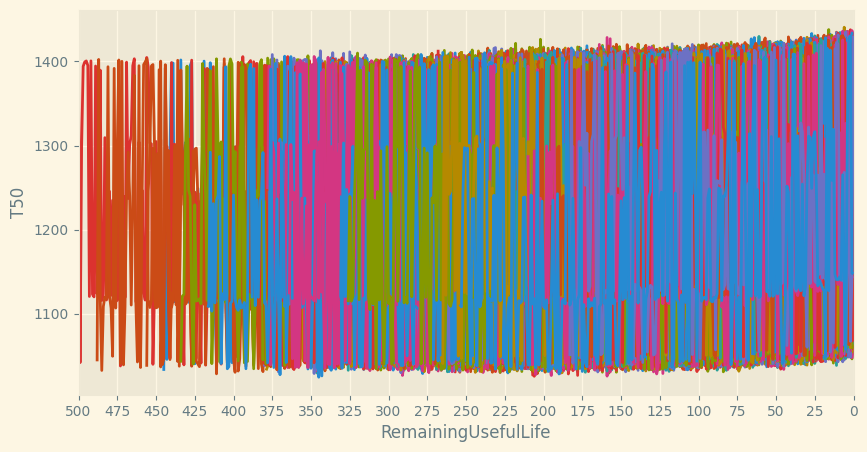

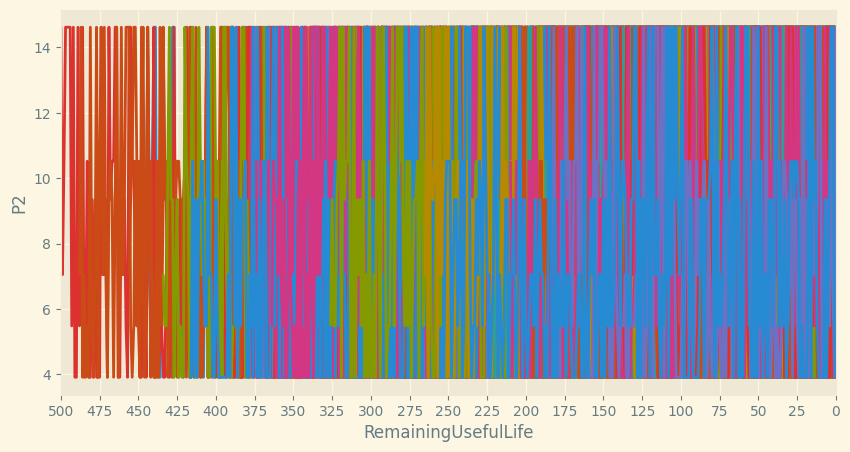

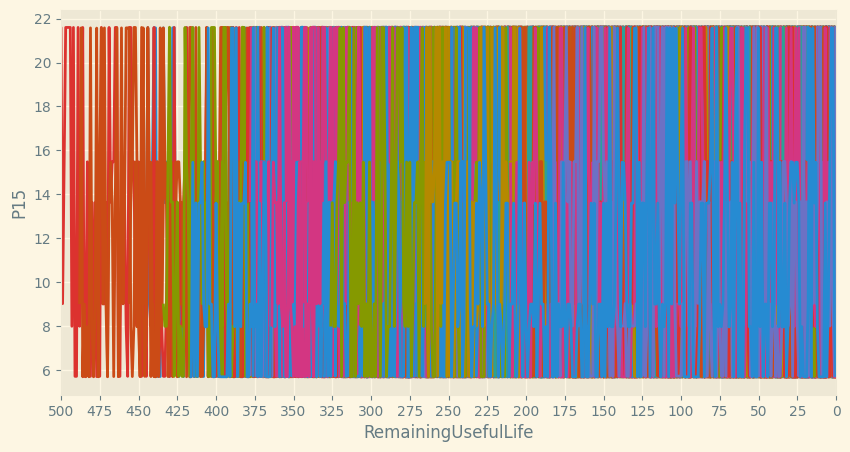

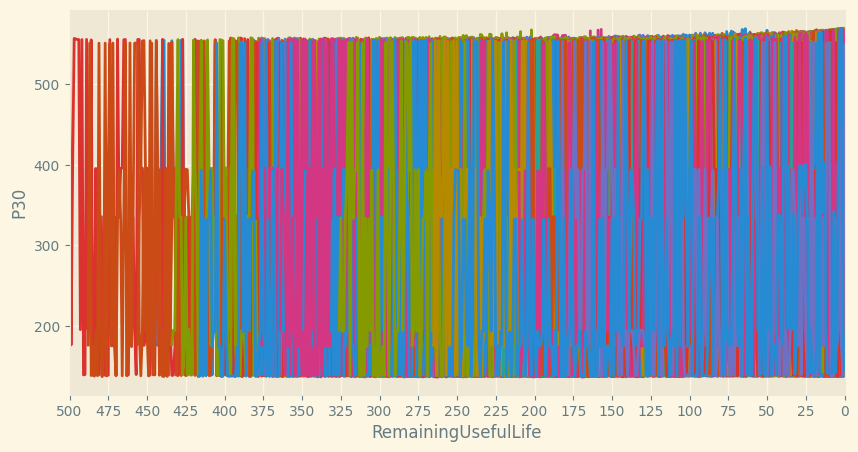

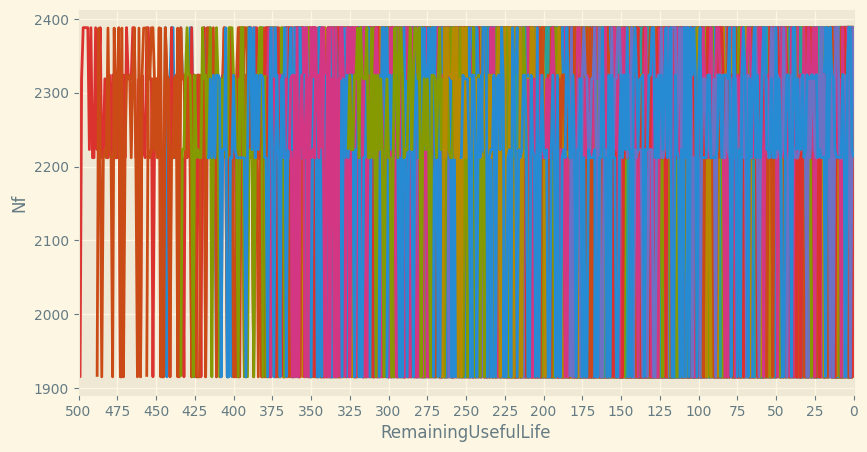

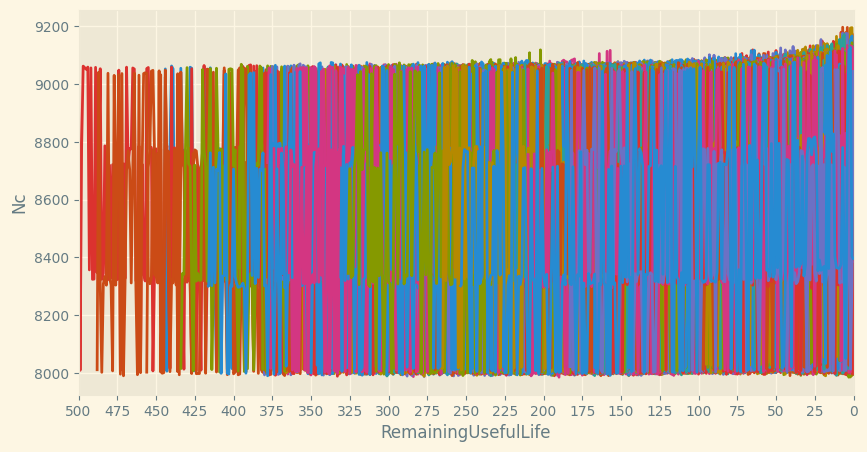

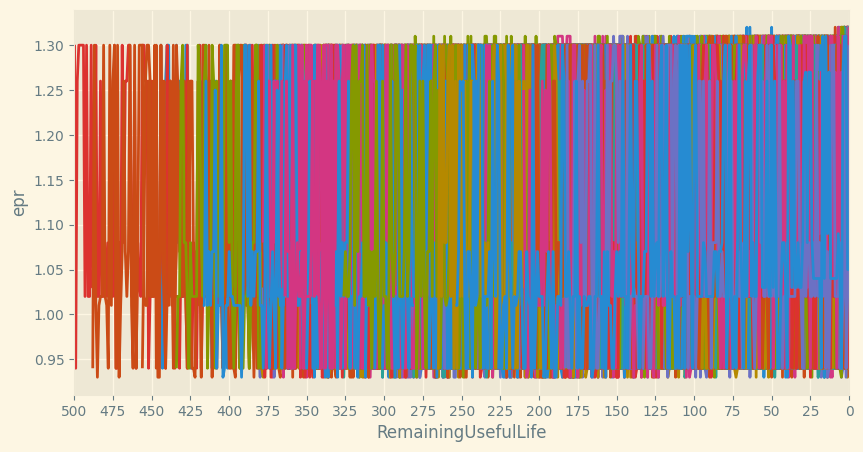

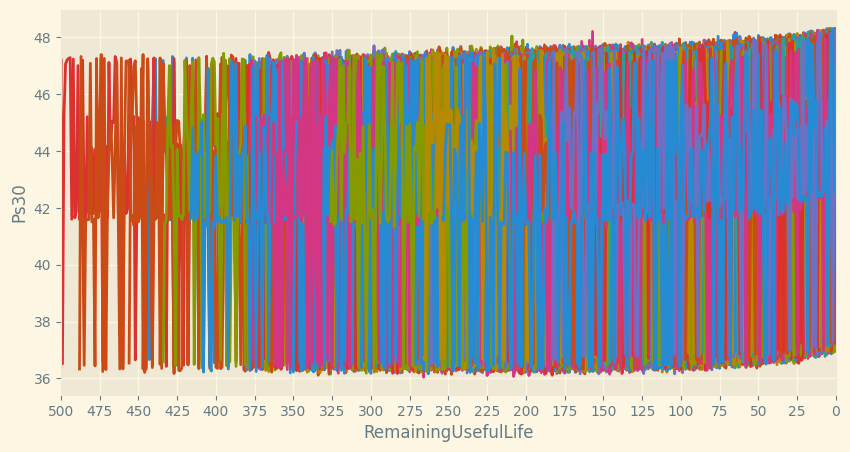

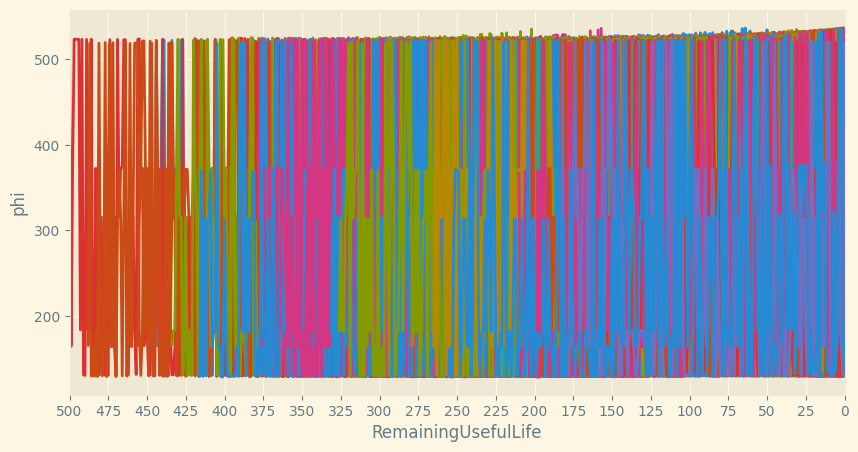

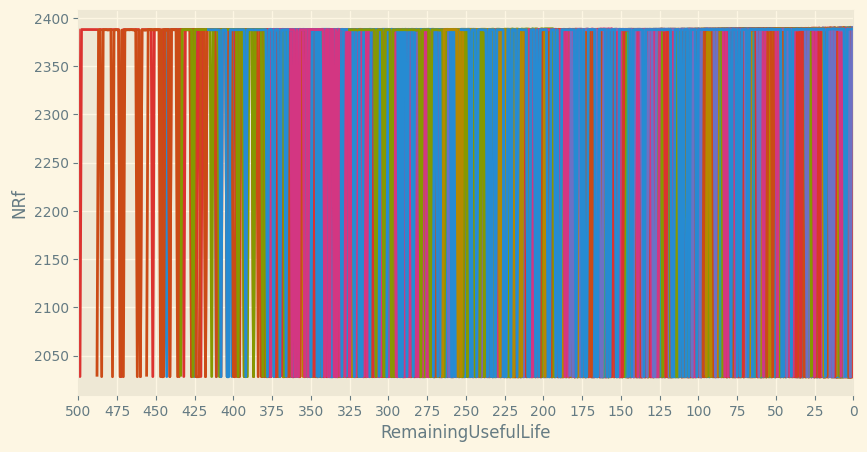

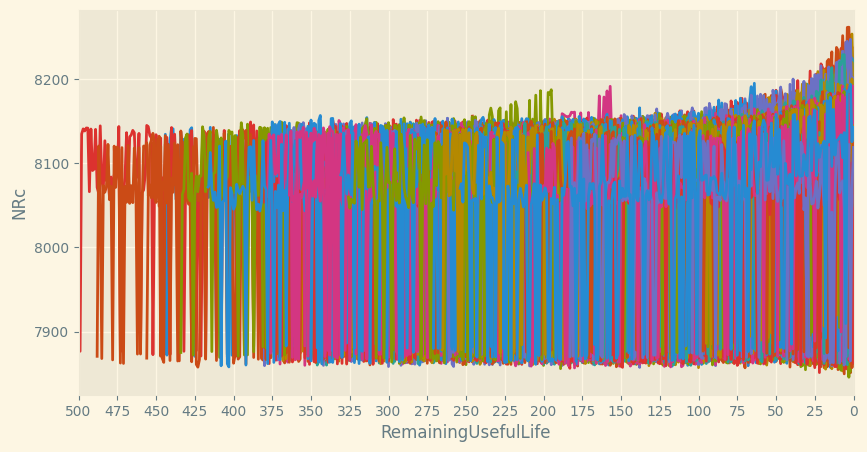

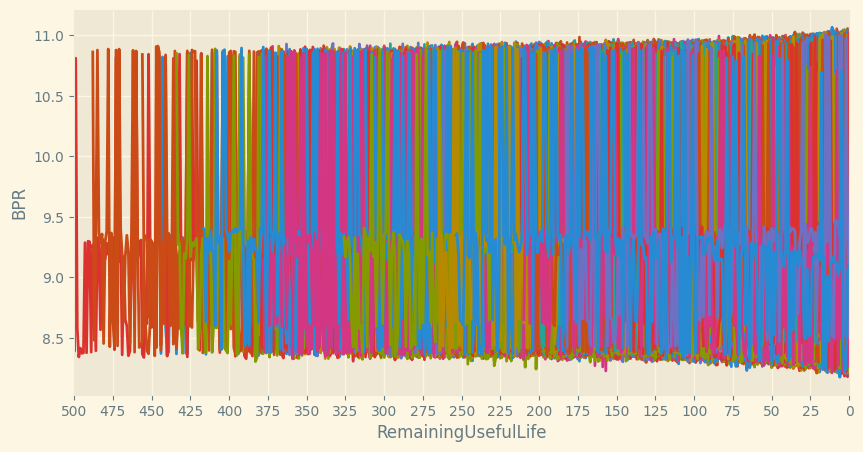

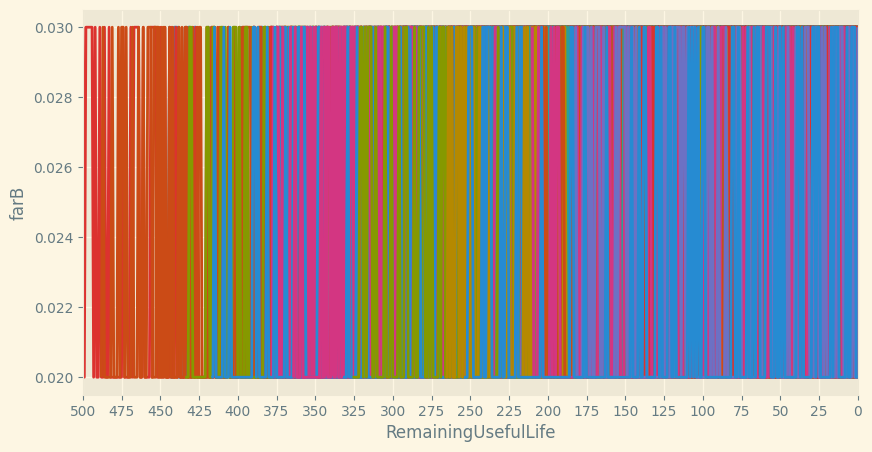

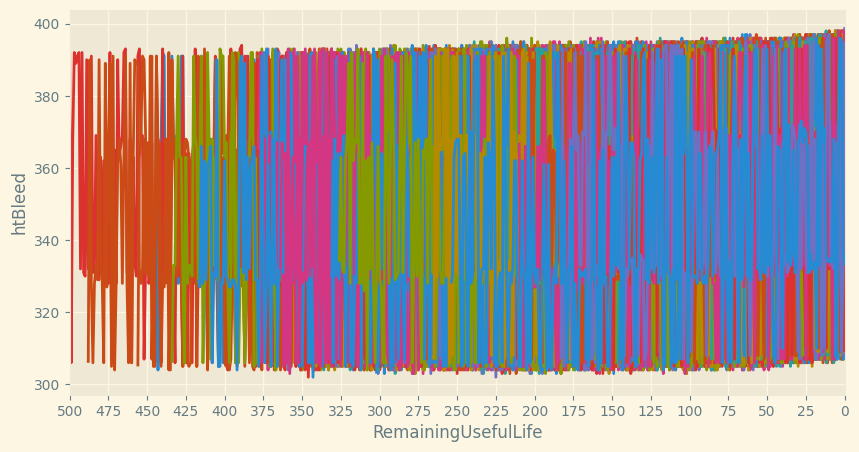

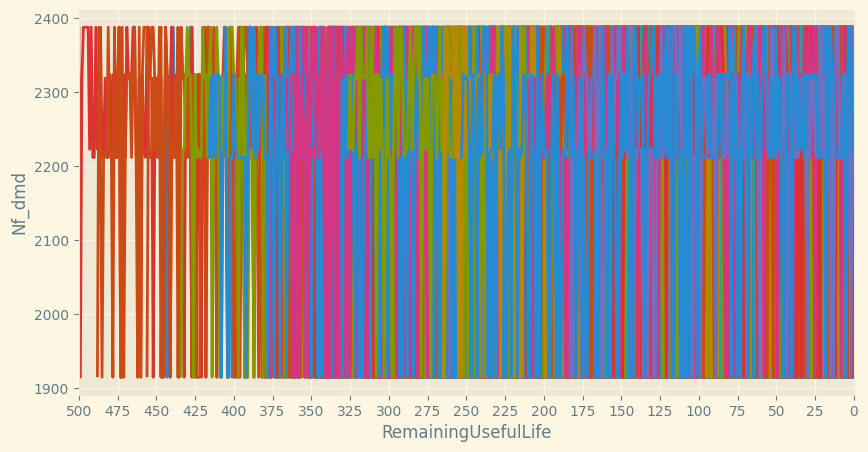

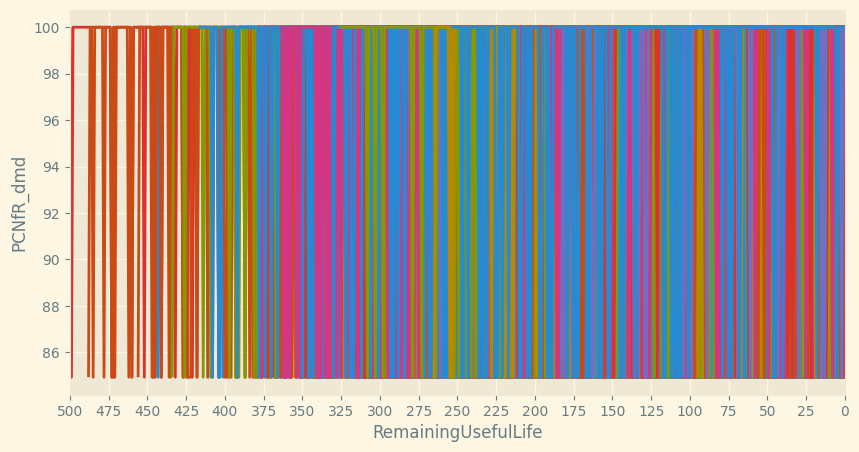

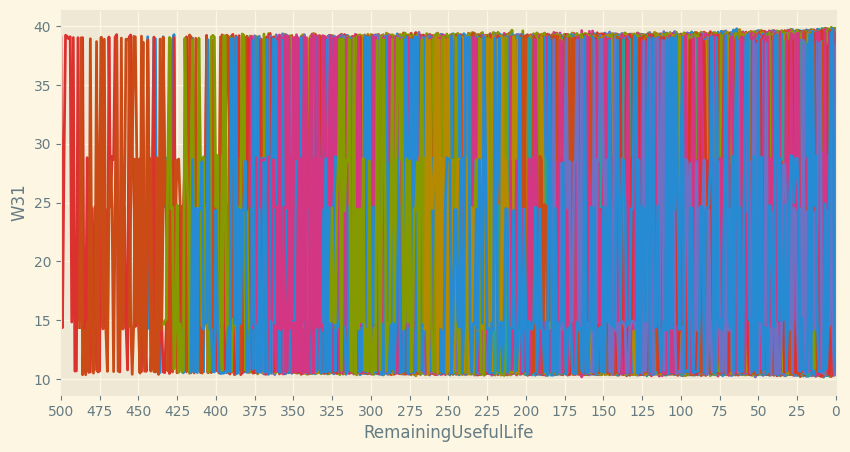

In [24]:
# plotting the line signals for each sensors in different engines
def plot_signal(df, signal_name, unit_nr=None):
    plt.figure(figsize=(10,5))
    
    if unit_nr:
        plt.plot('RUL', signal_name, data= df[df['unit_nr']==unit_nr])
    else:
        for i in train['unit_nr'].unique():
            if(i%1 ==0): #only plotting every unit_nr
                plt.plot('RUL', signal_name, data= df[df['unit_nr']==i])
                
    plt.xlim(500,0) #reverse the x-axix so RUL counts down to 0
    plt.xticks(np.arange(0, 525, 25))
    plt.ylabel(signal_name)
    plt.xlabel('RemainingUsefulLife')
    plt.show()
    sns.set
    
for sensor in sensor_names:
    plot_signal(X_train_condition_scaled, sensor)

These trends do not represent the respective direction on whether the sensor readings
keep increasing or reducing. The trends in the graphs are based on the condition scaled features. 